# KNN classifier
In this part, we will use knn algorithm to classify whether the data is cat or dog.
We will convert a 128128 image into a 128128 dimensional vector, where each component represents the grayscale value of the corresponding pixel. By calculating the Manhattan distance, we select the majority class from the k nearest points to the predicted point, and predict the image to belong to that class.


## split the cat and dog data into train and test
Because the data is a little unbalanced, we will choose the same number of cat and dog data for training.
The number of cat and dog image are 9997 and 10288 respectively. We will choose 8000 cat and dog images for training and 1997 cat and 2288 dog images for testing.

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pandas as pd
import seaborn as sns

In [6]:
# load the data
cat_path = '.\data\cat'
dog_path = '.\data\dog'
cat_list = os.listdir(cat_path)
dog_list = os.listdir(dog_path)
cat_list = [os.path.join(cat_path, i) for i in cat_list]
dog_list = [os.path.join(dog_path, i) for i in dog_list]


In [7]:
# split the data into train and test
cat_train, cat_test = train_test_split(cat_list, test_size=1997/9997, random_state=42)
dog_train, dog_test = train_test_split(dog_list, test_size=2288/10288, random_state=42)
train_list = cat_train + dog_train
test_list = cat_test + dog_test
train_label = [0] * len(cat_train) + [1] * len(dog_train)
test_label = [0] * len(cat_test) + [1] * len(dog_test)


In [8]:
# convert the image into a vector
for i in range(len(train_list)):
    img = cv.imread(train_list[i], 0)
    img = img.reshape(1, -1)
    if i == 0:
        train_data = img
    else:
        train_data = np.concatenate((train_data, img), axis=0)

In [9]:
for i in range(len(test_list)):
    img = cv.imread(test_list[i], 0)
    img = img.reshape(1, -1)
    if i == 0:
        test_data = img
    else:
        test_data = np.concatenate((test_data, img), axis=0)

In [ ]:
# knn classifier
acc=[]
cml=[]
repl=[]
for k in range(1,48):
    knn = KNeighborsClassifier(n_neighbors=k,weights="distance",algorithm="auto",p=1,metric="minkowski")
    knn.fit(train_data, train_label)
    pred = knn.predict(test_data)
    acc.append(accuracy_score(test_label, pred))
    cml.append(confusion_matrix(test_label, pred))
    repl.append(classification_report(test_label, pred))
    print("k=",k,"accuracy=",accuracy_score(test_label, pred))
    print("k=",k,"confusion matrix=",confusion_matrix(test_label, pred))
    print("k=",k,"classification report=",classification_report(test_label, pred))
#acc5=accuracy_score(test_label, pred)
#print('accuracy: ', accuracy_score(test_label, pred))
#print('confusion matrix: ', confusion_matrix(test_label, pred))
#print('classification report: ', classification_report(test_label, pred))

k= 1 accuracy= 0.5617269544924154
k= 1 confusion matrix= [[1168  829]
 [1049 1239]]
k= 1 classification report=               precision    recall  f1-score   support

           0       0.53      0.58      0.55      1997
           1       0.60      0.54      0.57      2288

    accuracy                           0.56      4285
   macro avg       0.56      0.56      0.56      4285
weighted avg       0.57      0.56      0.56      4285

k= 2 accuracy= 0.5617269544924154
k= 2 confusion matrix= [[1168  829]
 [1049 1239]]
k= 2 classification report=               precision    recall  f1-score   support

           0       0.53      0.58      0.55      1997
           1       0.60      0.54      0.57      2288

    accuracy                           0.56      4285
   macro avg       0.56      0.56      0.56      4285
weighted avg       0.57      0.56      0.56      4285

k= 3 accuracy= 0.5757292882147025
k= 3 confusion matrix= [[1172  825]
 [ 993 1295]]
k= 3 classification report=           

In [ ]:
# plot the accuracy
plt.plot(range(1,48), acc)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()


It is obvious that the accuracy is the highest when k=36 and 46. So we will choose k=36 and 46 to do the following analysis.

In [10]:
knn = KNeighborsClassifier(n_neighbors=36,weights="distance",algorithm="auto",p=1,metric="minkowski")
knn.fit(train_data, train_label)
pred = knn.predict(test_data)
print("k=",36,"accuracy=",accuracy_score(test_label, pred))
print("k=",36,"confusion matrix=",confusion_matrix(test_label, pred))
print("k=",36,"classification report=",classification_report(test_label, pred))

k= 36 accuracy= 0.6126021003500584
k= 36 confusion matrix= [[1074  923]
 [ 737 1551]]
k= 36 classification report=               precision    recall  f1-score   support

           0       0.59      0.54      0.56      1997
           1       0.63      0.68      0.65      2288

    accuracy                           0.61      4285
   macro avg       0.61      0.61      0.61      4285
weighted avg       0.61      0.61      0.61      4285



<Axes: >

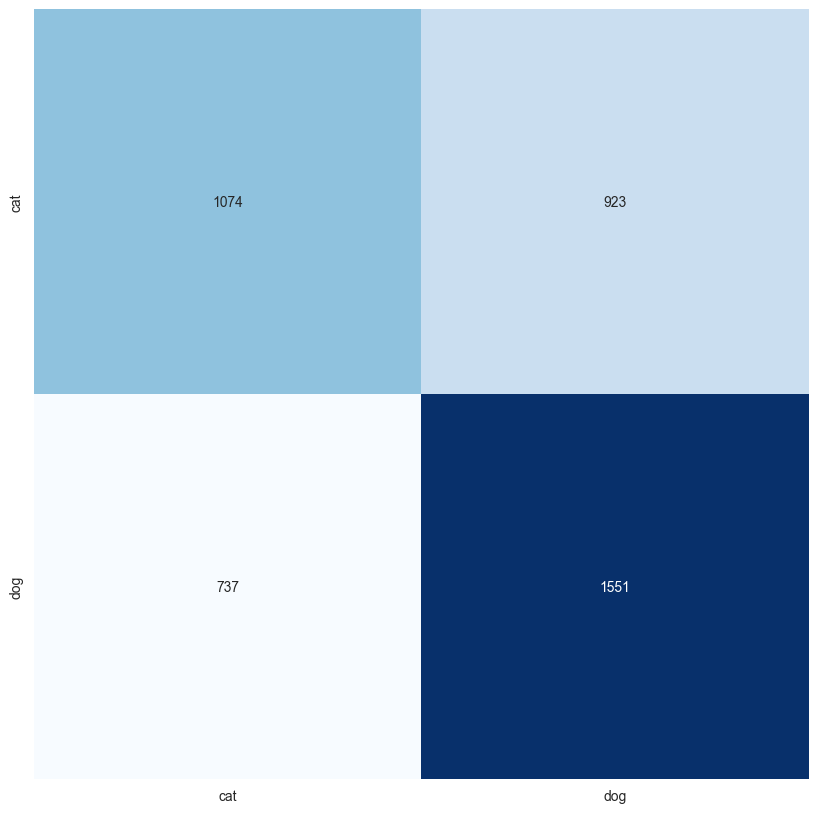

In [16]:
cm = confusion_matrix(test_label, pred)
#plot the confusion matrix and show the number of each class
f=plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True, fmt='d',cmap="Blues", cbar=False,xticklabels=['cat', 'dog'],yticklabels=['cat', 'dog'])

In [17]:
knn = KNeighborsClassifier(n_neighbors=46,weights="distance",algorithm="auto",p=1,metric="minkowski")
knn.fit(train_data, train_label)
pred = knn.predict(test_data)
print("k=",46,"accuracy=",accuracy_score(test_label, pred))
print("k=",46,"confusion matrix=",confusion_matrix(test_label, pred))
print("k=",46,"classification report=",classification_report(test_label, pred))

k= 46 accuracy= 0.6128354725787631
k= 46 confusion matrix= [[1056  941]
 [ 718 1570]]
k= 46 classification report=               precision    recall  f1-score   support

           0       0.60      0.53      0.56      1997
           1       0.63      0.69      0.65      2288

    accuracy                           0.61      4285
   macro avg       0.61      0.61      0.61      4285
weighted avg       0.61      0.61      0.61      4285



<Axes: >

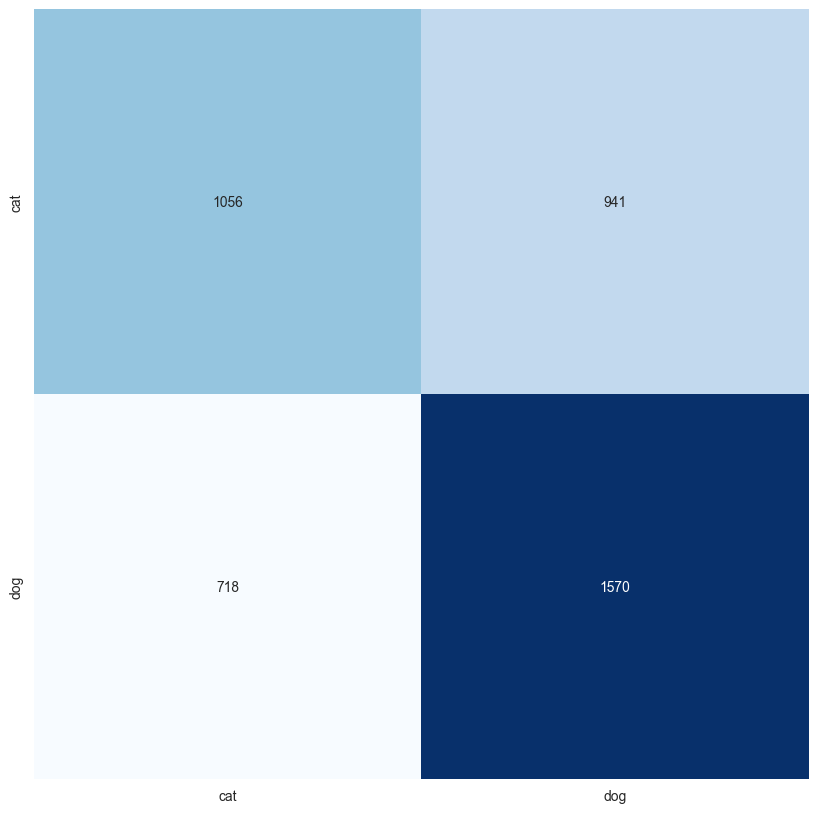

In [18]:
cm = confusion_matrix(test_label, pred)
#plot the confusion matrix and show the number of each class
f=plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True, fmt='d',cmap="Blues", cbar=False,xticklabels=['cat', 'dog'],yticklabels=['cat', 'dog'])

The accuracy is about 61.3%. It cannot reach our goal,so we need to change the way to classify.